Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

Implementing the Thompson Sampling

In [4]:
import random
N = 1000
d = 10
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(number_of_rewards_1[i]+1,number_of_rewards_0[i]+1)
    if(random_beta>max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n ,ad]
  if reward == 1:
    number_of_rewards_1[ad] = number_of_rewards_1[ad]+1
  else:
    number_of_rewards_0[ad] = number_of_rewards_0[ad]+1
  total_reward = total_reward + 1

Visualing the result

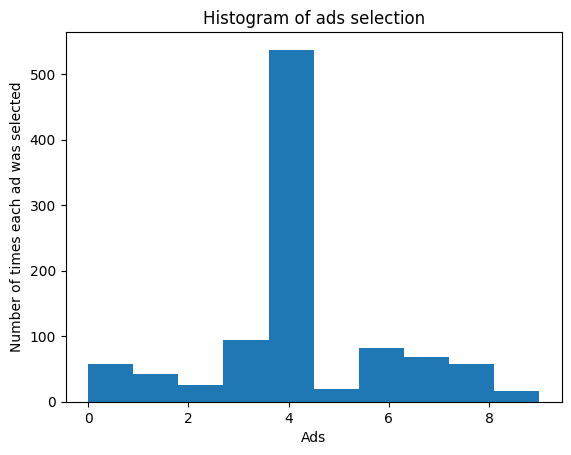

In [5]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()